## THE MUTUALLY EXCULSIVE AND COLLECTIVELY EXHAUSTIVE FEATURE LEARNING SCHEME

# THE PACKAGES INVOLVED ARE AS FOLLOWS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans #For Two Phase clustering 
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cross_validation import train_test_split #For splitting the data as train set and test set
from sklearn.neighbors import KNeighborsClassifier #For Classification
from sklearn.metrics import confusion_matrix,classification_report #Evaluation of metrics
from sklearn.ensemble import RandomForestClassifier #for RANDOM FOREST SCHEME
import statsmodels.api as sm
import plotly.figure_factory as ff
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
import math


/home/manidharsyv/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# DataProcessing

In [2]:
dataset=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/uci-secom.csv")
dataset=dataset.loc[:,'1':'589']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 589 entries, 1 to 589
dtypes: float64(589)
memory usage: 7.0 MB


In [3]:
sum1=dataset.sum(axis=0)
lis=[]
for i in range(0,589):
    if(sum1[i]==0):
        lis.append(str(i+1))
print("Features with all rows in a columns as Zeros",lis)
print("total features omitted :",len(lis))

Features with all rows in a columns as Zeros ['13', '52', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']
total features omitted : 112


In [4]:
dataset.drop(lis, 1, inplace=True)#the features obtained in the above step are omitted
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 477 entries, 1 to 589
dtypes: float64(477)
memory usage: 5.7 MB


In [5]:
dataset=dataset.fillna(dataset.mean())#Null values are replaced with mean values
dataset.to_csv('preprocessed123.csv')#the dataset after preprocessing is saved as .csv file

In [6]:
data=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/uci-secom.csv")
data=data['Pass/Fail']
count1=0
count2=0
for i in data:
    if i==-1:
        count1+=1
    else:
        count2+=1
print(" -1 instances= ",count1,"\n","1 instances=",count2)
    

 -1 instances=  1463 
 1 instances= 104


In [7]:
data=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/uci-secom.csv")
data=data['Pass/Fail']
dataset = np.float64(dataset)
x_train,x_test,y_train,y_test = train_test_split(dataset,data,test_size=0.1,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)
imp=np.argsort(model_rf.feature_importances_)
imp=imp[0:15]
imp=list(imp)
for i in range(len(imp)):
    imp[i]=str(imp[i])
print("The features selcted using random forest :",imp)

(1410, 477) (157, 477) (1410,) (157,)
The features selcted using random forest : ['194', '290', '71', '40', '47', '191', '295', '391', '4', '66', '419', '237', '318', '217', '320']


In [8]:
data1 = pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/preprocessed123.csv")
data1=data1.loc[:,imp]
data1=data1.dropna(1)

/home/manidharsyv/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [9]:
x_train,x_test,y_train,y_test = train_test_split(data1,data,test_size=0.3,random_state=0)
print("shape of the test set and train set")
x_train.shape,x_test.shape,y_train.shape,y_test.shape

shape of the test set and train set


((1096, 12), (471, 12), (1096,), (471,))

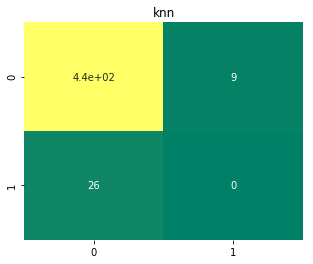

             precision    recall  f1-score   support

         -1    0.94372   0.97978   0.96141       445
          1    0.00000   0.00000   0.00000        26

avg / total    0.89163   0.92569   0.90834       471

 PPV= 0.0 
 NPV= 94.37229437229438 
 sensitivity= 0.0 
 specificity= 97.97752808988764 
 Accuracy= 92.56900212314225


In [10]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_test,y_predict_knn,digits=5)
print(cr_rt)
tn,fp,fn,tp =confusion_matrix(y_test,y_predict_knn).ravel()
PPV_rf=(tp/(tp+fp))*100
NPV_rf=(tn/(tn+fn))*100
Sentivity_rf=(tp/(tp+fn))*100
Specificity_rf=(tn/(tn+fp))*100
Accuracy_rf=((tp+tn)/(tp+tn+fp+fn))*100
print(' PPV=',PPV_rf,'\n','NPV=',NPV_rf,'\n','sensitivity=',Sentivity_rf,'\n','specificity=',Specificity_rf,'\n','Accuracy=',Accuracy_rf)

In [11]:
data=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/uci-secom.csv")
data1=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/tranformed.csv")
data=data['Pass/Fail']

In [12]:
data1.shape

(477, 1568)

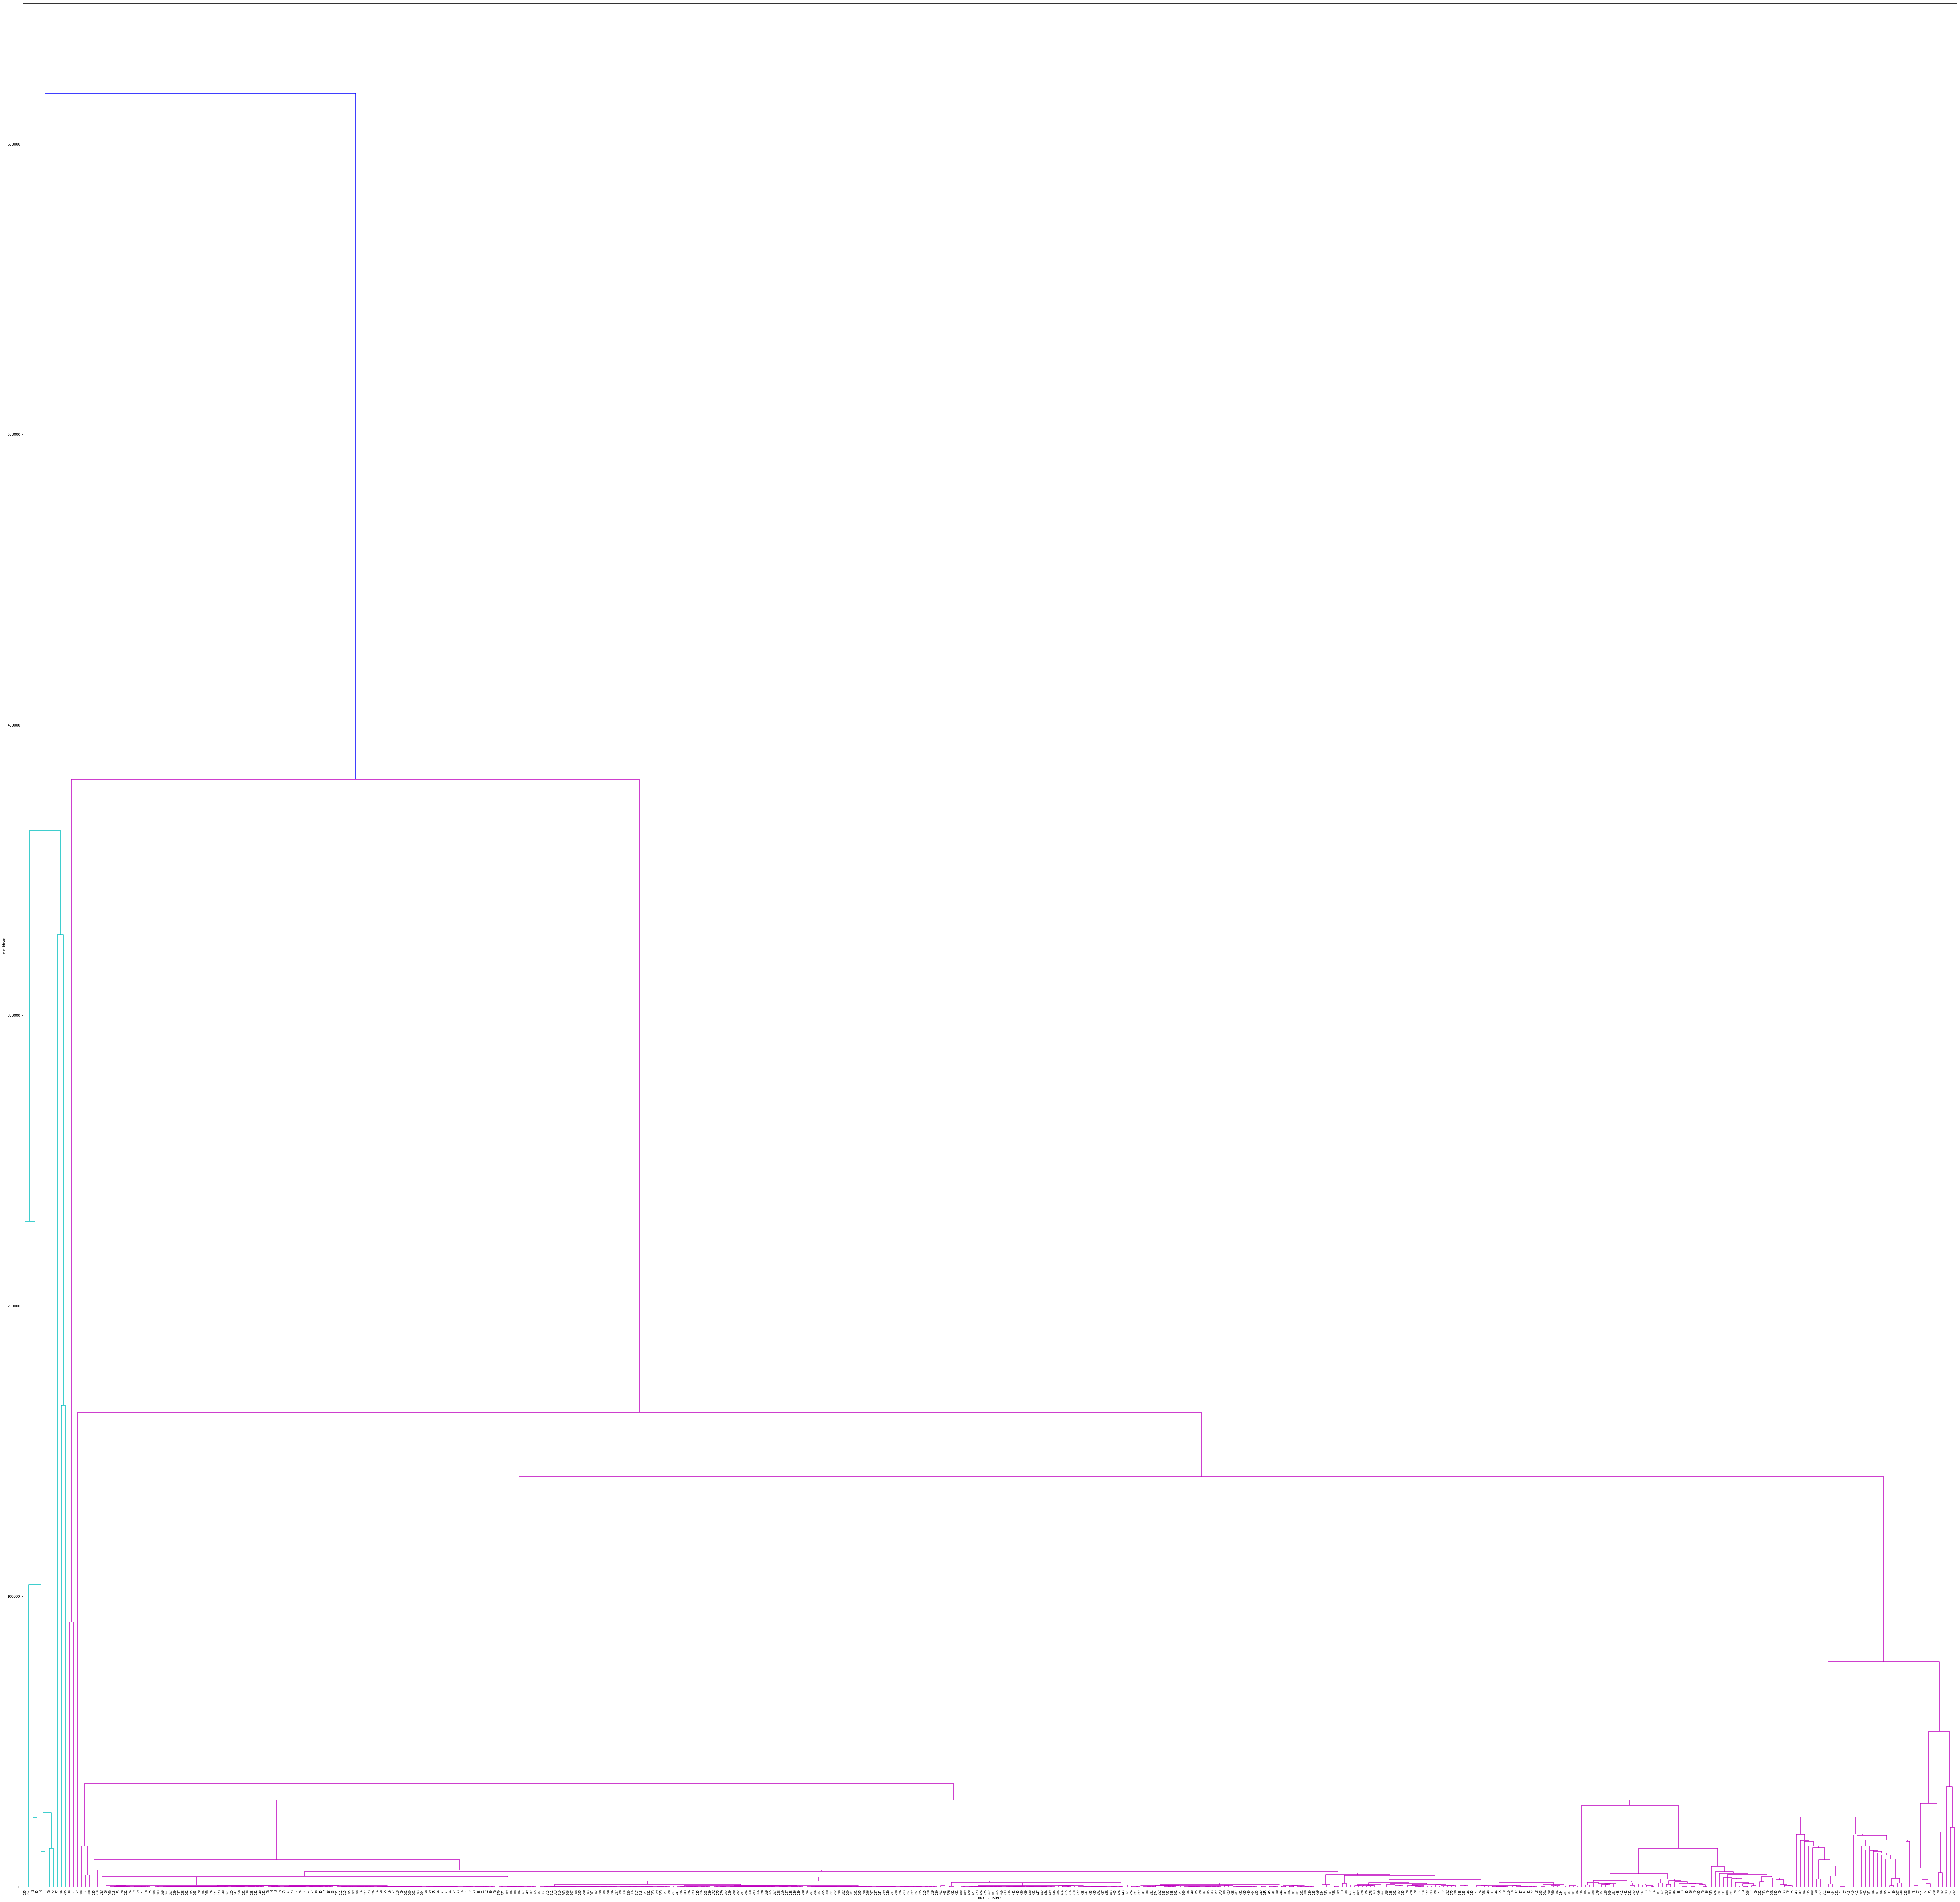

(476, 4)
[1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


(477,)

In [13]:
plt.figure(figsize=(100,100))
sch.set_link_color_palette(['c','m','y','k','b'])
s = sch.linkage(data1,method= 'ward')
dendogram = sch.dendrogram(s,leaf_rotation=90.,leaf_font_size=8.,show_leaf_counts=True)
plt.xlabel('no of clusters')
plt.ylabel('euclidean')
plt.show()
# plt.savefig('1.jpg')
print(s.shape)
n=4
hc = AgglomerativeClustering(n_clusters=n)
hc.fit(data1)
dat = hc.fit_predict(data1)
print(dat)
dat.shape

In [14]:
m=200
kmeans = KMeans(n_clusters=m)  
kmeans.fit(data1)
print("Cluster labels",kmeans.labels_, kmeans.labels_.shape) 
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data1)
print("Feature labels closest to the centre of their cluster",closest,len(closest))

Cluster labels [ 29   4  20  62  49 177 179 179 179 179 179  51  96  14  96 179 139  96
 179   3  15   9   8 179 179 136 155 179 179 136 109  96  92  74  92  74
 109 104 106 136 155  47  96 102  94 179 161 179 117  70 136 136  24 179
 179 136 145  47  96 153 162 166 149  54  58 121 179  11  91  17  65  18
  18  18  18  18  18  18  18  18 190  18  18 188  18  25  18   1  18  18
  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18 188  49  88
  18 188  18  40 188  35  18 188 190 140 136 140 140 188 188 188 188  18
 188 188 188  10 132  72  63  76 129  36  19 190 182 182 182 182 182  86
 190  82 146 182 184 182 182 182  53  13  23   6   2 182 182 182 188 182
 182 182 182 182 182 182 182 182 182 182  84 182 196  64 182 163 147  98
 182 183 143 125  95 150 174 119 107  16 151 125 126  77 125 125 125 125
 125 125 125 125 125 173 125 125 125 125  66 125  22 125 125 125 125 125
 125 154 125 125 125  73 125  71 125 125 125  85 152 173 141  90 128 193
  61  46 173  85  85  85  85  85 142

In [15]:
cl=[]
cls=[]
for i in closest:
    cl.append(int(i))
cl=sorted(cl)
for i in cl:
    cls.append(str(i))
print(cls)

['0', '1', '2', '3', '5', '11', '13', '16', '19', '20', '21', '22', '23', '26', '30', '32', '33', '37', '38', '41', '42', '43', '44', '46', '48', '49', '52', '55', '56', '59', '60', '61', '62', '63', '64', '65', '67', '68', '69', '70', '85', '87', '92', '106', '107', '111', '113', '116', '119', '121', '129', '130', '131', '132', '133', '134', '135', '136', '143', '145', '146', '148', '152', '153', '154', '155', '156', '157', '172', '174', '175', '177', '178', '179', '181', '182', '184', '185', '186', '187', '188', '189', '190', '192', '193', '208', '210', '212', '217', '221', '223', '228', '230', '231', '232', '233', '234', '235', '242', '243', '244', '251', '252', '253', '254', '255', '256', '277', '278', '280', '281', '284', '286', '287', '288', '292', '293', '309', '311', '314', '324', '326', '337', '338', '339', '341', '342', '343', '346', '347', '348', '351', '352', '353', '354', '355', '356', '357', '359', '361', '362', '363', '367', '372', '374', '375', '376', '379', '380', '381

In [16]:
data1 = pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/preprocessed123.csv")
data1=data1.loc[:,cls]
data1=data1.dropna(1)
data1.shape
x_train,x_test,y_train,y_test = train_test_split(data1,data,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

/home/manidharsyv/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



((1096, 157), (471, 157), (1096,), (471,))

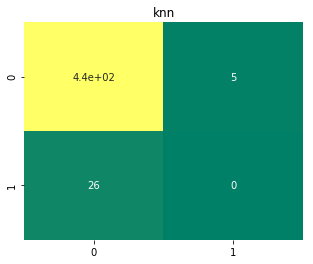

             precision    recall  f1-score   support

         -1    0.94421   0.98876   0.96597       445
          1    0.00000   0.00000   0.00000        26

avg / total    0.89208   0.93418   0.91265       471

 PPV= 0.0 
 NPV= 94.4206008583691 
 sensitivity= 0.0 
 specificity= 98.87640449438202 
 Accuracy= 93.41825902335457


In [17]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_test,y_predict_knn,digits=5)
print(cr_rt)
tn,fp,fn,tp =confusion_matrix(y_test,y_predict_knn).ravel()
PPV_tps=(tp/(tp+fp))*100
NPV_tps=(tn/(tn+fn))*100
Sentivity_tps=(tp/(tp+fn))*100
Specificity_tps=(tn/(tn+fp))*100
Accuracy_tps=((tp+tn)/(tp+tn+fp+fn))*100
print(' PPV=',PPV_tps,'\n','NPV=',NPV_tps,'\n','sensitivity=',Sentivity_tps,'\n','specificity=',Specificity_tps,'\n','Accuracy=',Accuracy_tps)

In [18]:
data = pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/preprocessed123.csv")
data1 = pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/uci-secom.csv")
X = pd.DataFrame(data=data)
y = data1['Pass/Fail']

In [19]:
def stepwise_selection(X, y, 
                        initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with f-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with f-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


/home/manidharsyv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



Add  42                             with f-value 0.0
Add  69                             with f-value 0.0
Add  5                              with f-value 0.0
Add  49                             with f-value 0.0
Add  59                             with f-value 5.67481e-10
Add  64                             with f-value 6.41284e-08
Add  348                            with f-value 5.4592e-05
Add  21                             with f-value 6.09008e-05
Add  124                            with f-value 0.00038819
Add  332                            with f-value 0.00141743
Add  196                            with f-value 3.18317e-05
Add  75                             with f-value 0.00015728
Add  204                            with f-value 0.00204489
Add  99                             with f-value 0.00180504
Add  437                            with f-value 0.00286186
Add  214                            with f-value 0.00773344
resulting features:
['42', '69', '5', '49', '59', '64', '348', '

In [20]:
data1 = pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/preprocessed123.csv")
data1=data1.loc[:,result]
x_train,x_test,y_train,y_test = train_test_split(data1,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1096, 16), (471, 16), (1096,), (471,))

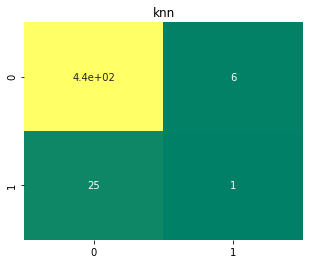

             precision    recall  f1-score   support

         -1    0.94612   0.98652   0.96590       445
          1    0.14286   0.03846   0.06061        26

avg / total    0.90178   0.93418   0.91592       471

 PPV= 14.285714285714285 
 NPV= 94.61206896551724 
 sensitivity= 3.8461538461538463 
 specificity= 98.65168539325843 
 Accuracy= 93.41825902335457


In [21]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_test,y_predict_knn,digits=5)
print(cr_rt)
tn,fp,fn,tp =confusion_matrix(y_test,y_predict_knn).ravel()
PPV_ss=(tp/(tp+fp))*100
NPV_ss=(tn/(tn+fn))*100
Sentivity_ss=(tp/(tp+fn))*100
Specificity_ss=(tn/(tn+fp))*100
Accuracy_ss=((tp+tn)/(tp+tn+fp+fn))*100
print(' PPV=',PPV_ss,'\n','NPV=',NPV_ss,'\n','sensitivity=',Sentivity_ss,'\n','specificity=',Specificity_ss,'\n','Accuracy=',Accuracy_ss)

In [22]:
data=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/uci-secom.csv")
data1=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/tranformed.csv")
data=data['Pass/Fail']

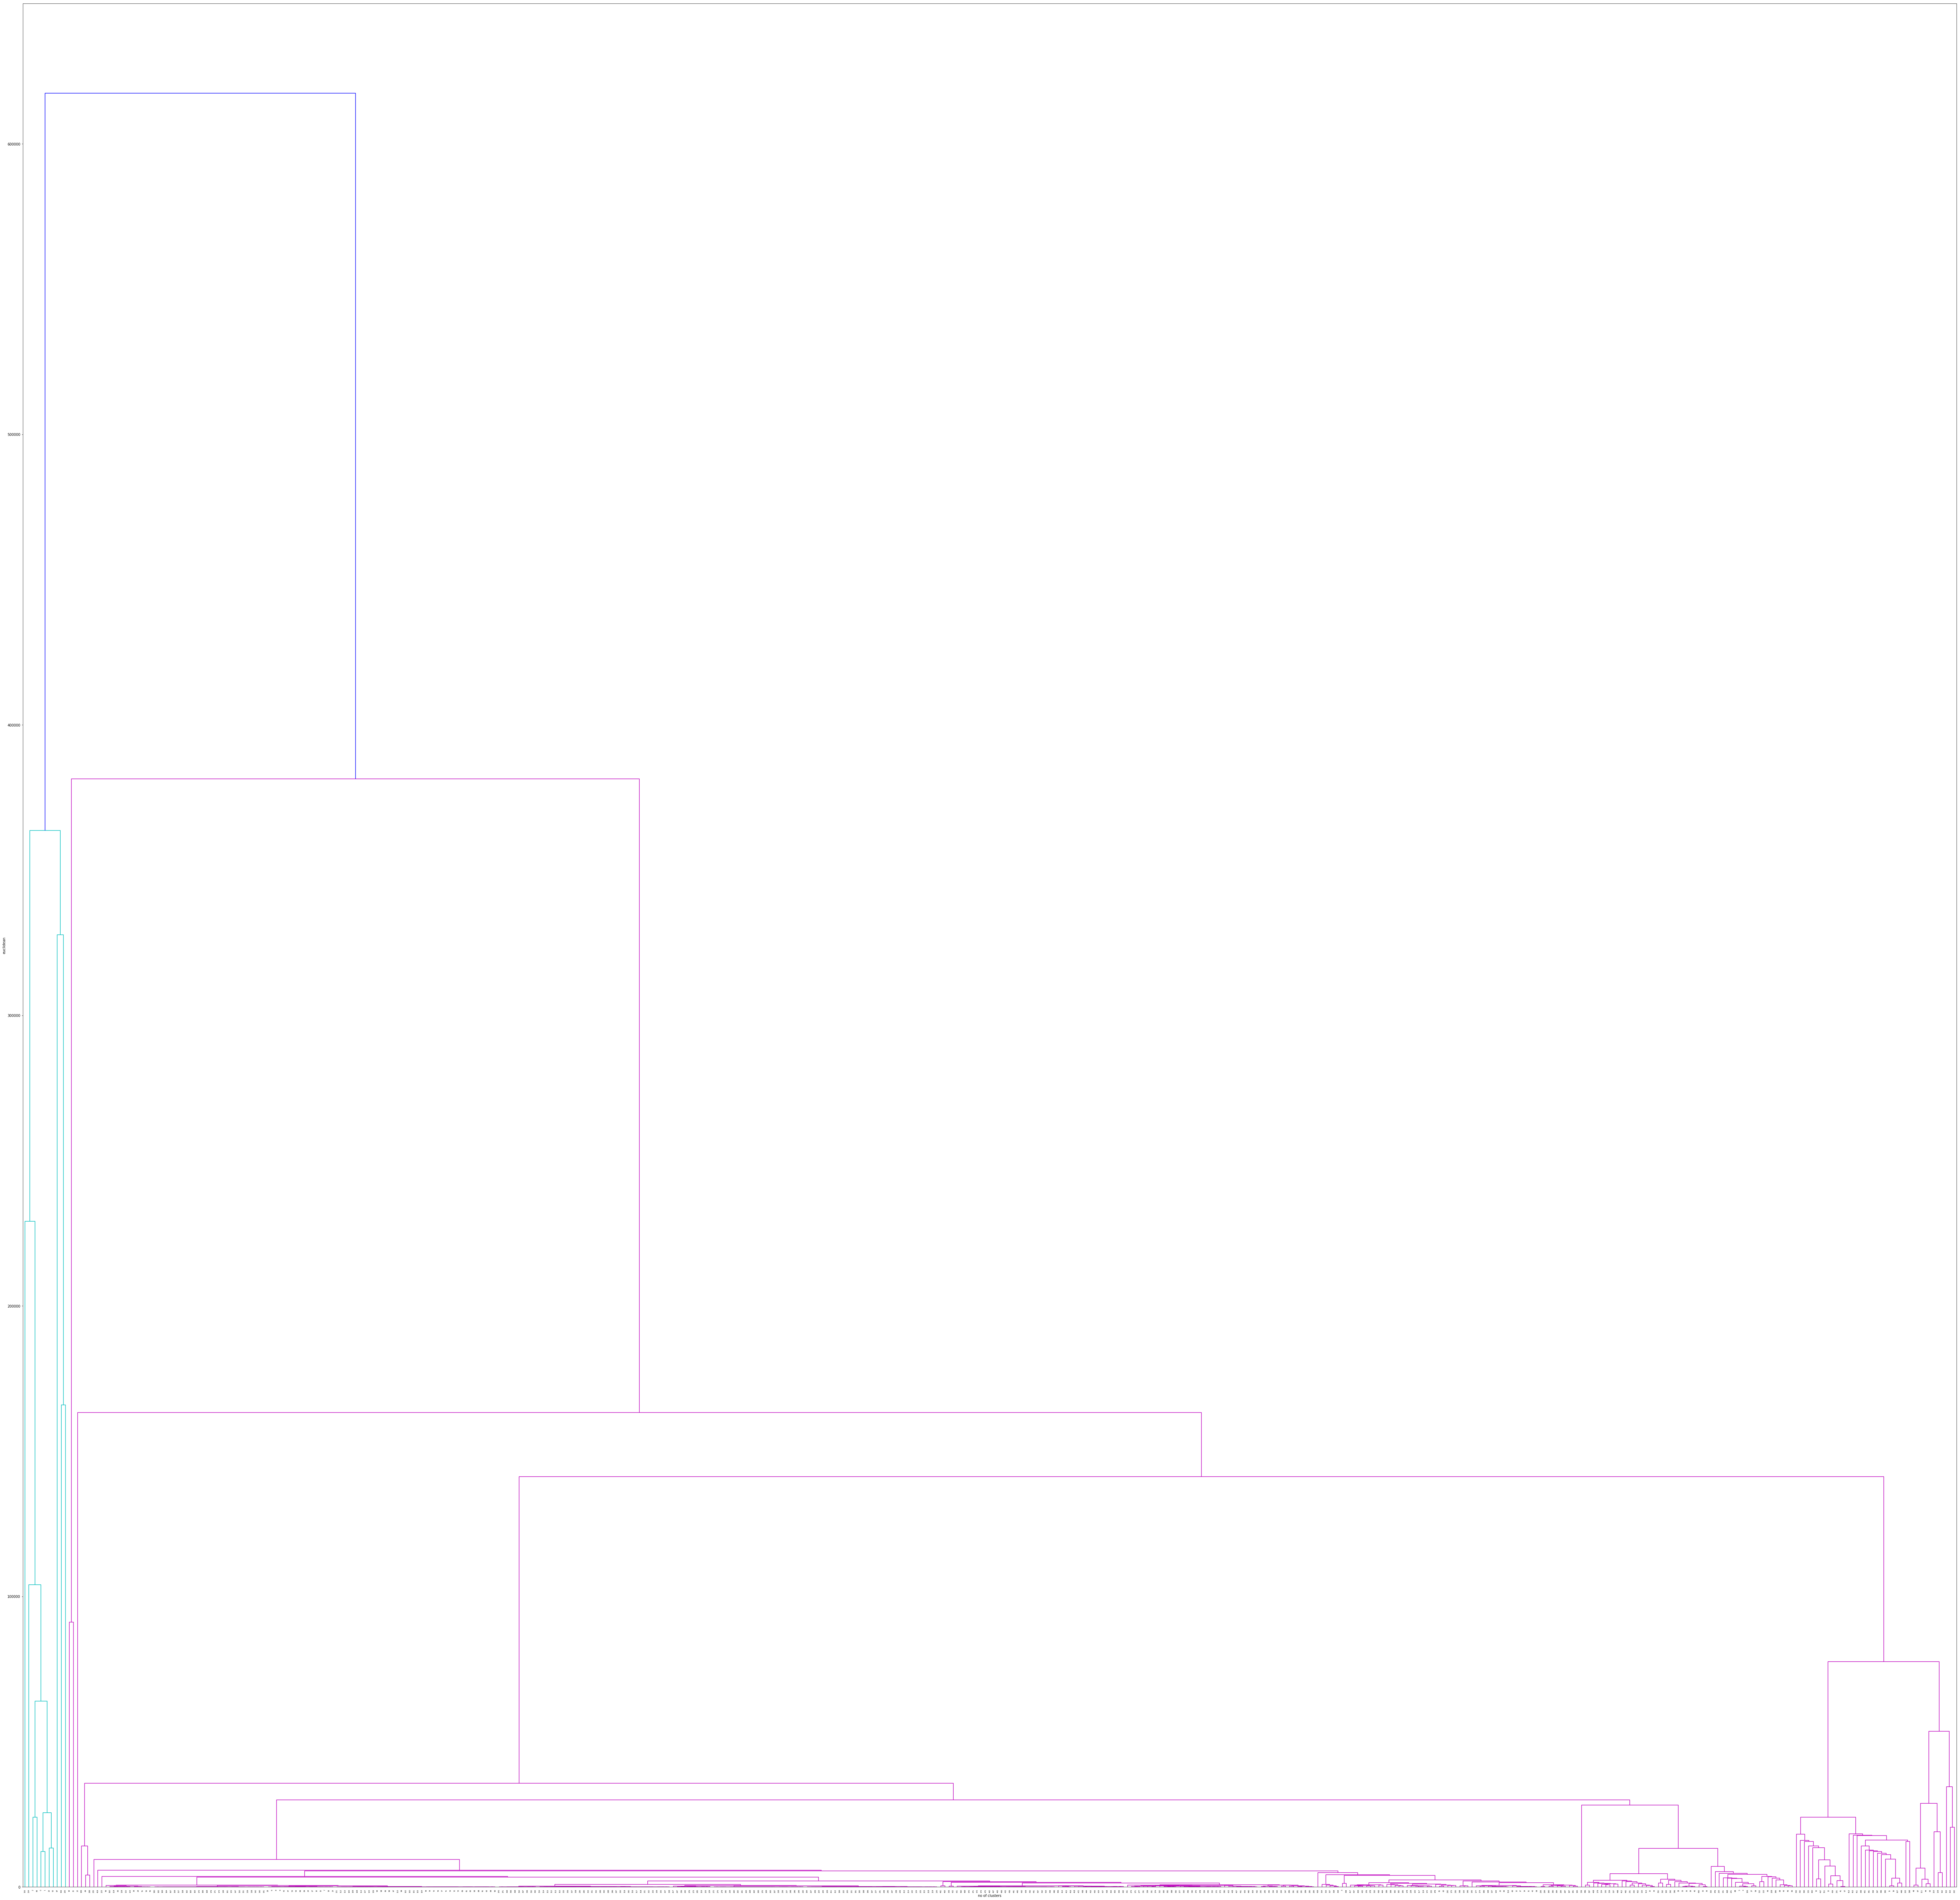

(476, 4)
[1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


(477,)

In [23]:
plt.figure(figsize=(100,100))
sch.set_link_color_palette(['c','m','y','k','b'])
s = sch.linkage(data1,method= 'ward')
dendogram = sch.dendrogram(s)
plt.xlabel('no of clusters')
plt.ylabel('euclidean')
plt.show()
# plt.savefig('1.jpg')
print(s.shape)
n=4
hc = AgglomerativeClustering(n_clusters=n)
hc.fit(data1)
dat = hc.fit_predict(data1)
print(dat)
dat.shape

In [24]:
m=100
kmeans = KMeans(n_clusters=m)  
kmeans.fit(data1)
print("Cluster labels",kmeans.labels_, kmeans.labels_.shape) 
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data1)
print("Feature labels closest to the centre of their cluster",closest,len(closest))

Cluster labels [32 25 19 67 41 41 33 33 33 33 33 21 12 14 12 33 21 12 33  7 27  4  8 33
 33 33 53 33 33 33 41 12 68 53 68 53 41 85 99 33 53 51 12 59  9 33 59 33
 42 69 33 33  2 33 33 33 33 51 12 85 12 12 90 96 16 59 33 42 94 59 62 33
 33 33 33 33 33 33 33 33 33 33 33 33 33 11 33  1 33 33 33 33 33 33 33 33
 33 33 33 33 33 33 33 33 33 33 41 81 33 33 33 75 33 53 33 33 33 12 33 12
 12 33 33 33 33 33 33 33 33 50 68 71 56 78 68 39 18 33 33 33 33 33 33 77
 33 89 77 33 33 33 33 33 26 15 20  5  3 33 33 33 33 33 33 33 33 33 33 33
 33 33 33 33 12 33 12 90 33 92 12 68 33 79 12 33 79 12 92 79 90 31 79 63
 79 80 63 63 63 63 63 63 63 63 63 33 63 63 63 63 72 63 17 63 63 63 63 63
 63 63 63 63 63 74 63 64 63 63 63 63 12 63 90 93 93 12 55 52 63 63 63 63
 63 63 63 63 92 63 63 63 63 63 63 87 13 36 10  6 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 92 63 63 92 63 63 92 12 63 63 92 63 92 79 63 92 79
 57 63 63 92 90 79 79 63 63 63 63 63 63 63 63 63 63 63 63 63 63 68 63 44
 63 63 63 63 63 63 63 63 63 63 63 63

In [25]:
closest=sorted(closest)
cls1=[]
for i in closest:
    cls1.append(str(i))
print(cls1)

['0', '1', '2', '3', '4', '13', '16', '19', '20', '21', '22', '34', '35', '38', '41', '44', '48', '49', '52', '59', '63', '64', '65', '68', '70', '85', '87', '105', '107', '111', '120', '129', '131', '132', '133', '135', '136', '143', '145', '152', '153', '154', '155', '156', '175', '189', '193', '208', '210', '221', '223', '232', '234', '235', '251', '252', '253', '254', '255', '263', '284', '288', '311', '326', '338', '342', '343', '346', '355', '356', '357', '361', '362', '372', '381', '385', '386', '394', '395', '396', '397', '398', '399', '400', '401', '408', '410', '411', '412', '413', '419', '433', '437', '442', '449', '457', '459', '463', '468', '476']


In [26]:
data2=pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/preprocessed123.csv")
data2=data2.loc[:,cls1]
data2=data2.dropna(1)
data2=data2.replace(0,data2.mean()) 


/home/manidharsyv/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [27]:
X = pd.DataFrame(data=data2)
y = data

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


/home/manidharsyv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



Add  49                             with p-value 0.0
Add  59                             with p-value 5.67481e-10
Add  64                             with p-value 6.41284e-08
Add  21                             with p-value 3.80627e-05
Add  343                            with p-value 0.000620201
Add  210                            with p-value 0.00830193
Add  437                            with p-value 0.00962604
Add  129                            with p-value 0.00733754
Add  111                            with p-value 0.00363613
resulting features:
['49', '59', '64', '21', '343', '210', '437', '129', '111']


In [29]:
data1 = pd.read_csv("/home/manidharsyv/Desktop/MINIPROJECT/preprocessed123.csv")
data1=data1.loc[:,result]
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data1,data,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1096, 9), (471, 9), (1096,), (471,))

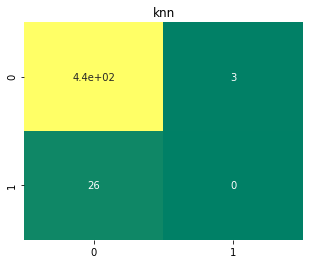

             precision    recall  f1-score   support

         -1    0.94444   0.99326   0.96824       445
          1    0.00000   0.00000   0.00000        26

avg / total    0.89231   0.93843   0.91479       471

 PPV= 0.0 
 NPV= 94.44444444444444 
 sensitivity= 0.0 
 specificity= 99.32584269662922 
 Accuracy= 93.84288747346072


In [30]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_test,y_predict_knn,digits=5)
print(cr_rt)
tn,fp,fn,tp =confusion_matrix(y_test,y_predict_knn).ravel()
PPV_mece=(tp/(tp+fp))*100
NPV_mece=(tn/(tn+fn))*100
Sentivity_mece=(tp/(tp+fn))*100
Specificity_mece=(tn/(tn+fp))*100
Accuracy_mece=((tp+tn)/(tp+tn+fp+fn))*100
print(' PPV=',PPV_mece,'\n','NPV=',NPV_mece,'\n','sensitivity=',Sentivity_mece,'\n','specificity=',Specificity_mece,'\n','Accuracy=',Accuracy_mece)

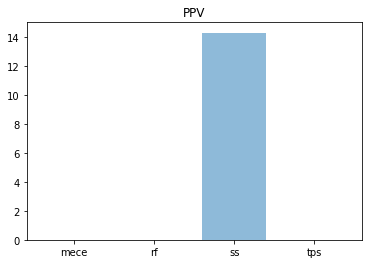

In [31]:
y = [PPV_mece,PPV_rf,PPV_ss,PPV_tps]
N = len(y)
x = range(N)
objects = ('mece','rf','ss','tps')
y_pos = np.arange(len(objects))
performance = [PPV_mece,PPV_rf,PPV_ss,PPV_tps]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('PPV')
 
plt.show()

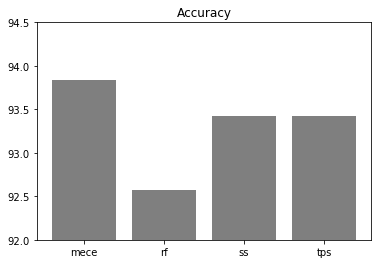

In [32]:
y = [Accuracy_mece,Accuracy_rf,Accuracy_ss,Accuracy_tps]
N = len(y)
x = range(N)
objects = ('mece','rf','ss','tps')
y_pos = np.arange(len(objects))
low = min(y)
high = max(y)
plt.ylim(92,94.5)
plt.bar(y_pos, y,color = 'Black',align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy')
plt.show()

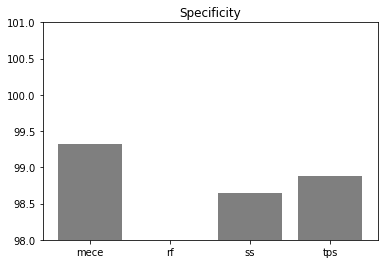

In [36]:
y = [Specificity_mece,Specificity_rf,Specificity_ss,Specificity_tps]
N = len(y)
x = range(N)
objects = ('mece','rf','ss','tps')
y_pos = np.arange(len(objects))
low = min(y)
high = max(y)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(y_pos, y,color = 'Black',align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Specificity')
plt.show()

/home/manidharsyv/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=95, top=95



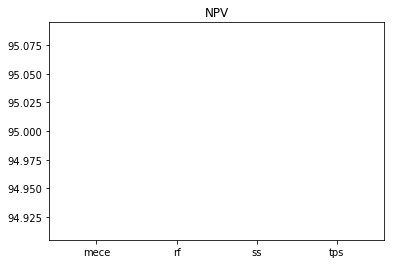

In [34]:
y = [NPV_mece,NPV_rf,NPV_ss,NPV_tps]
N = len(y)
x = range(N)
objects = ('mece','rf','ss','tps')
y_pos = np.arange(len(objects))
low = min(y)
high = max(y)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(y_pos, y,color = 'Black',align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('NPV')
plt.show()

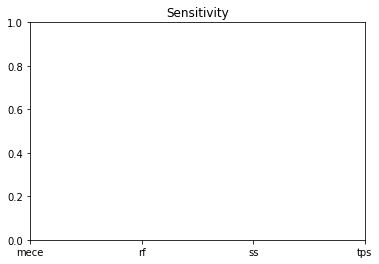

In [38]:
y = [Sentivity_mece,Sentivity_rf,Sentivity_ss,Sentivity_tps]
N = len(y)
x = range(N)
objects = ('mece','rf','ss','tps')
y_pos = np.arange(len(objects))


plt.xticks(y_pos, objects)
plt.title('Sensitivity')
plt.show()